In [ ]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
tickers_list = ["MSFT", "AMZN", "GOOG", "AAPL","META"]

In [ ]:
# Define data with Dataframe
data = pd.DataFrame(columns=tickers_list)
print(data)
for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2017-06-06','2020-06-06')['Adj Close']
data.head()

Empty DataFrame
Columns: [MSFT, AMZN, GOOG, AAPL, META]
Index: []


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,MSFT,AMZN,GOOG,AAPL,META
Date,,,,,
2017-06-06,66.753654,50.150002,48.772999,36.144218,152.496628
2017-06-07,66.633965,50.503502,48.991253,36.359509,152.805984
2017-06-08,66.228973,50.513500,49.114613,36.270588,154.392746
2017-06-09,64.728584,48.915501,47.437519,34.864136,149.293228
2017-06-12,64.231506,48.245499,47.091412,34.031021,148.135590


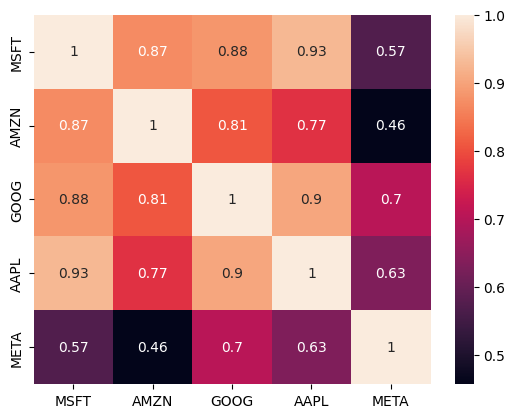

In [ ]:
corr = data.corr()
sns.heatmap(corr,annot=True)
plt.show()

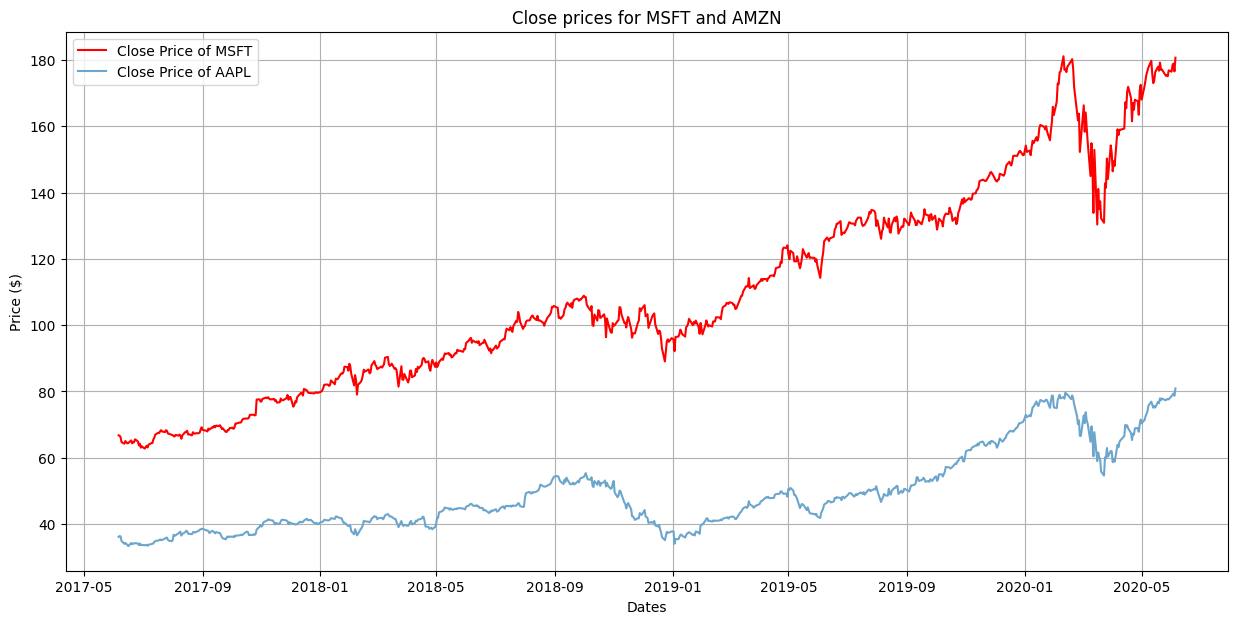

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(data['MSFT'], lw=1.5, label='Close Price of MSFT',color='red')
plt.plot(data['AAPL'], lw=1.5, label='Close Price of AAPL',color='#6CA6CD')
plt.grid(True)
plt.legend()
plt.axis('tight')
plt.xlabel('Dates')
plt.ylabel('Price ($)')
plt.title('Close prices for MSFT and AMZN')
plt.grid(True);
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
dataset = pd.DataFrame({
    'AAPL': data['AAPL'],
    'MSFT': data['MSFT']
})
train_close_a,test_close_a, train_close_m,test_close_m = train_test_split(dataset['AAPL'],dataset['MSFT'], test_size=0.3, shuffle=False)
print(train_close_a.shape,train_close_m.shape)
print(test_close_a.shape)

(529,) (529,)
(227,)


In [ ]:
from statsmodels.regression.linear_model import OLS
model= sm.OLS(train_close_a,train_close_m).fit()

In [ ]:
print(model.params)

MSFT    0.451184
dtype: float64


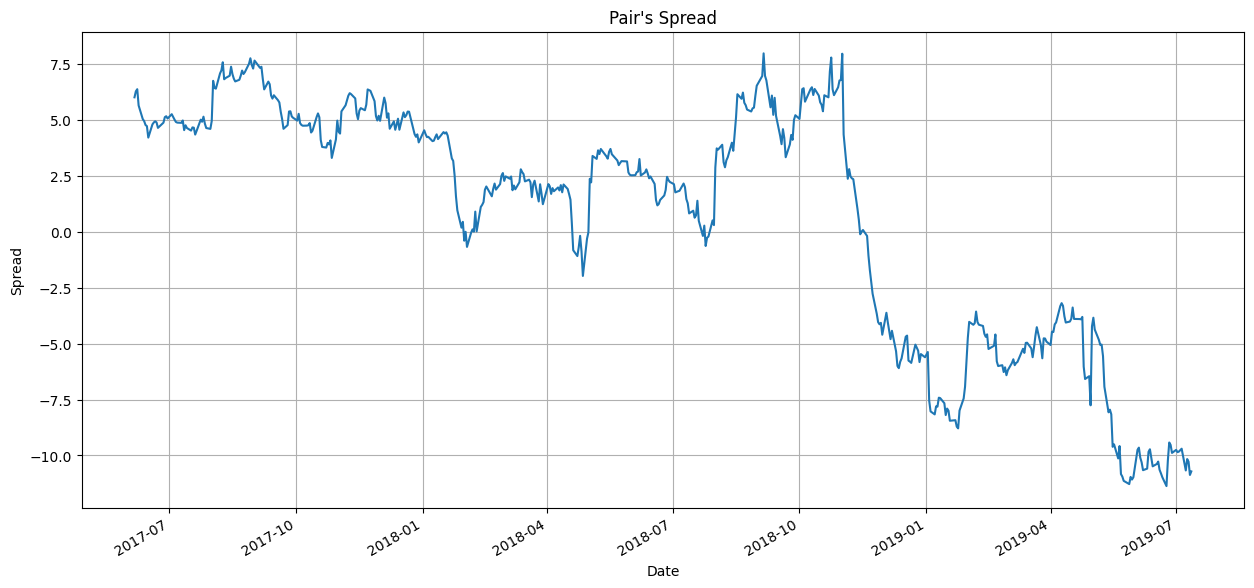

In [ ]:
spread = train_close_a - model.params[0] * train_close_m
plot = spread.plot(figsize=(15, 7), title = "Pair's Spread")
plot.set_ylabel("Spread")
plot.grid(True);

[*********************100%%**********************]  2 of 2 completed

before  Date
2020-07-01    197.623764
2020-07-02    199.129837
2020-07-06    203.416351
2020-07-07    201.051086
2020-07-08    205.472748
                 ...    
2023-06-23    332.419617
2023-06-26    326.049438
2023-06-27    331.973114
2023-06-28    333.243164
2023-06-29    332.449371
Name: MSFT, Length: 754, dtype: float64
After             const        MSFT
Date                         
2020-07-01    1.0  197.623764
2020-07-02    1.0  199.129837
2020-07-06    1.0  203.416351
2020-07-07    1.0  201.051086
2020-07-08    1.0  205.472748
...           ...         ...
2023-06-23    1.0  332.419617
2023-06-26    1.0  326.049438
2023-06-27    1.0  331.973114
2023-06-28    1.0  333.243164
2023-06-29    1.0  332.449371

[754 rows x 2 columns]


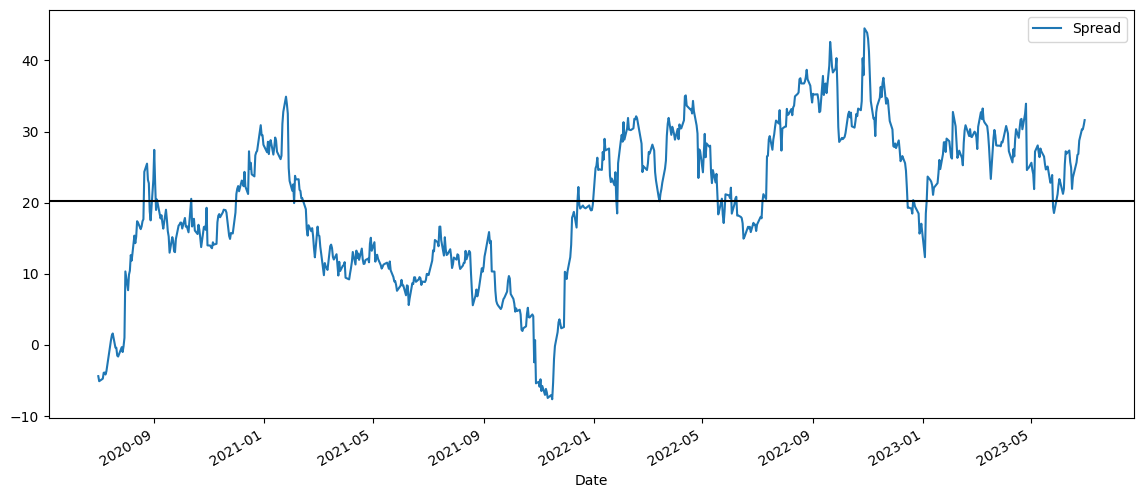

In [ ]:
stock_pair = [ 'MSFT','AAPL']
asset_pairs =  yf.download(stock_pair, start="2020-07-01" ,end= "2023-06-30")['Adj Close']

S1=asset_pairs['MSFT']
S2=asset_pairs['AAPL']
print("before ",S1)
S1 = sm.add_constant(S1)
print("After",S1)
results = sm.OLS(S2, S1).fit()
S1 = S1[stock_pair[0]]
b = results.params[stock_pair[0]]

spread = S2 - b * S1
spread.plot(figsize=(14, 6))
plt.axhline(spread.mean(), color='black')
plt.legend(['Spread'])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


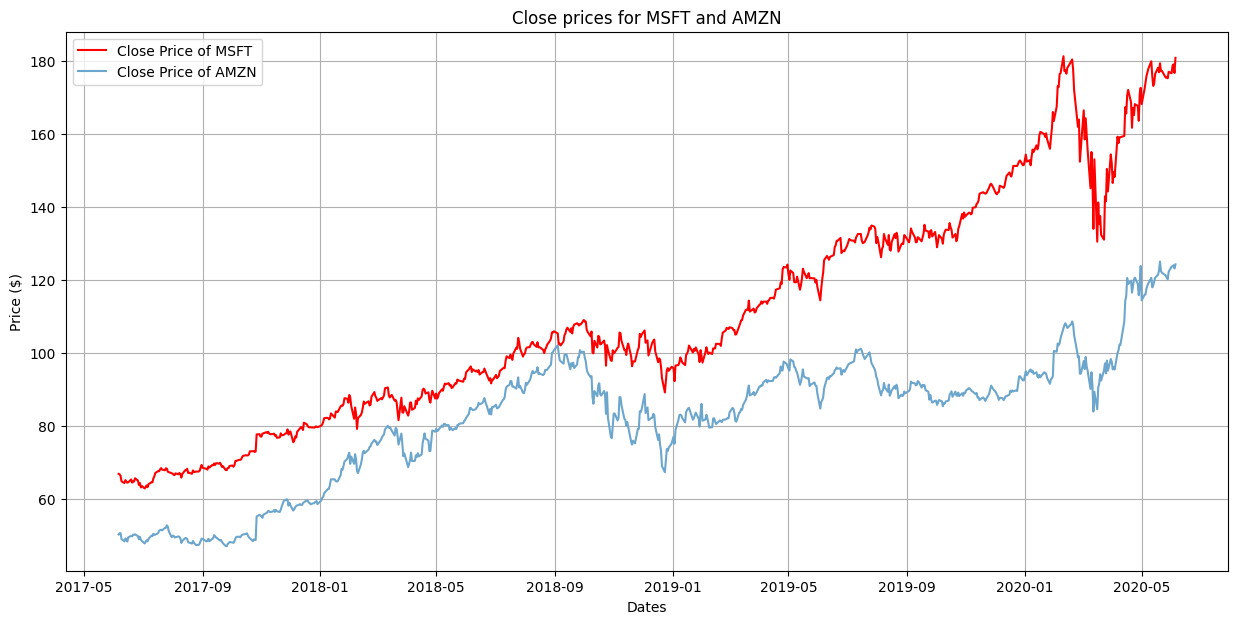

Hedge Ratio =  1.345841194040838
Correlation =  0.8691773454291587


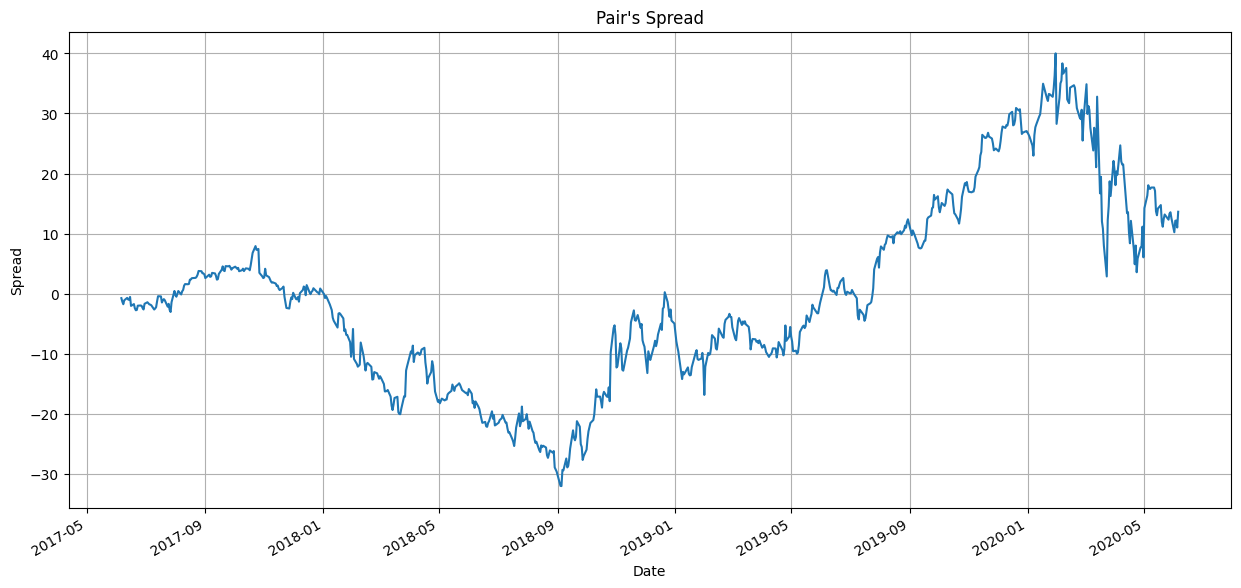

In [ ]:
#Import the libraries
import pandas as pd
import yfinance as yf
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define list of tickers
tickers_list = ["MSFT", "AMZN", "GOOG", "AAPL"]

# Define data with Dataframe
data = pd.DataFrame(columns=tickers_list)

# Fetch the data
for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2017-06-06','2020-06-06')['Adj Close']

# Show first five rows of the data
data.head()

%matplotlib inline

# Customise the size of the plot
plt.figure(figsize=(15, 7))
plt.plot(data['MSFT'], lw=1.5, label='Close Price of MSFT',color='red')
plt.plot(data['AMZN'], lw=1.5, label='Close Price of AMZN',color='#6CA6CD')
plt.grid(True)
plt.legend(loc=0)

# This helps us tighten the figure margins
plt.axis('tight')
plt.xlabel('Dates')
plt.ylabel('Price ($)')
plt.title('Close prices for MSFT and AMZN')
plt.grid(True);
plt.show()
                # Import the packages
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split

# Train-test-split
train_close, test_close = train_test_split(data[ticker], test_size=0.5, shuffle=False)

# Create a train dataframe of 2 assets
train = pd.DataFrame()
train['MSFT'] = data['MSFT']
train['AMZN'] = data['AMZN']

# Run OLS regression
model= sm.OLS(train["MSFT"],train["AMZN"]).fit()

# Print regression summary results
print('Hedge Ratio = ', model.params[0])
# Calculate spread
spread = train["MSFT"] - model.params[0] * train["AMZN"]
# Plot the spread
plot = spread.plot(figsize=(15, 7), title = "Pair's Spread")
plot.set_ylabel("Spread")
plot.grid(True);

# Calculate z-score
def zscore(series):
    return (series - series.mean()) / np.std(series)
test= pd.DataFrame()
test['MSFT'] = data['MSFT']
test['AMZN'] = data['AMZN']
# Calculate correlation
corr = train["MSFT"].corr(train["AMZN"])
print('Correlation = ', corr)

[*********************100%%**********************]  2 of 2 completed


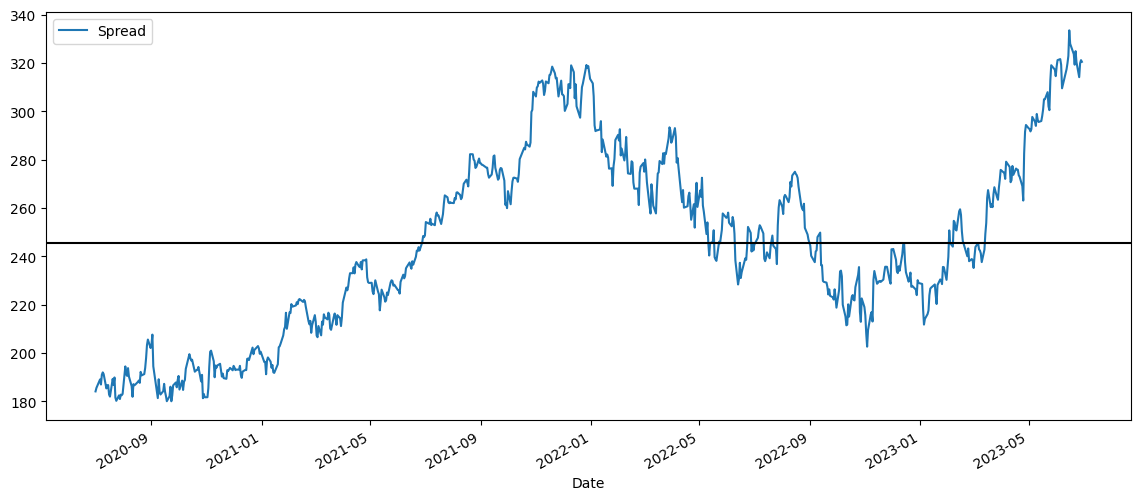

In [ ]:
stock_pair = [ 'AMZN','MSFT']
asset_pairs =  yf.download(stock_pair, start="2020-07-01" ,end= "2023-06-30")['Adj Close']

S1=asset_pairs[stock_pair[0]]
S2=asset_pairs[stock_pair[1]]

S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1[stock_pair[0]]
b = results.params[stock_pair[0]]

spread = S2 - b * S1
spread.plot(figsize=(14, 6))
plt.axhline(spread.mean(), color='black')
plt.legend(['Spread'])

In [ ]:
def zscore(series):
    lookback = 20
    scores = []
    for i in range(lookback, len(series)):
      window = series[i-lookback:i]
      scores.append((series[i]-window.mean())/window.std())
    return pd.Series(scores, index = series.index[lookback:])


In [ ]:
# def zscore(S1, S2):
#     lookback = 20
#     scores = []
#     for i in range(lookback, len(S1)):
#       windowX = S1[i-lookback:i]
#       windowY = S2[i-lookback:i]
#       windowX = sm.add_constant(windowX)
#       results = sm.OLS(windowY, windowX).fit()
#       windowX = windowX[stock_pair[0]]
#       b = results.params[stock_pair[0]]
#       a = results.params['const']
#       spread = windowY - b * windowX - a
#       scores.append((spread[-1]-spread.mean())/spread.std())
#     return pd.Series(scores, index = S1.index[lookback:])

In [ ]:
# zscores = zscore(S1, S2)
# zscores.plot(figsize=(14, 6))
# plt.axhline(0.0, color='black')
# plt.axhline(1.0, color='green', linestyle='--')
# plt.axhline(-1.0, color='green', linestyle='--')
# plt.legend(['20-day rolling window Z-Score'])

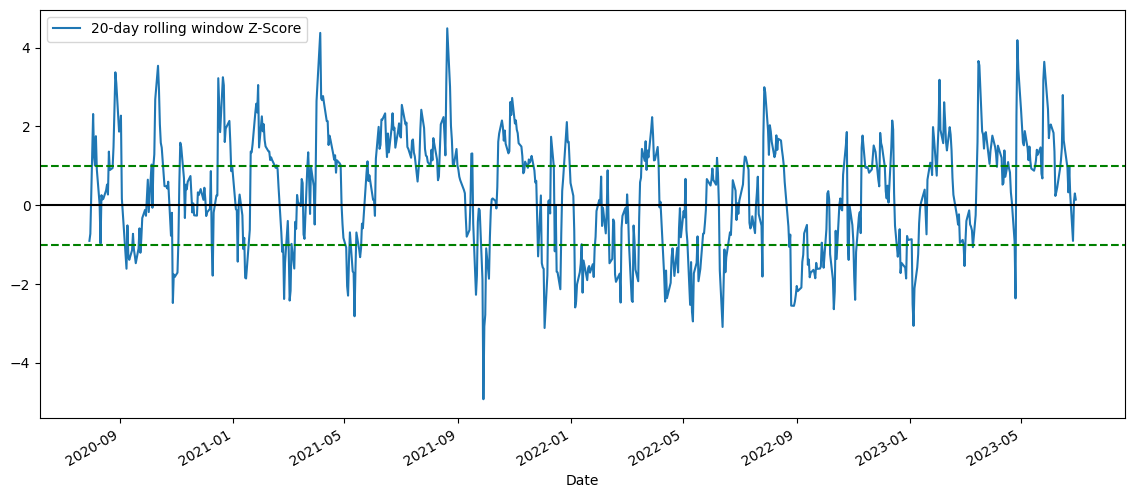

In [ ]:
zscore(spread).plot(figsize=(14, 6))
plt.axhline(0.0, color='black')
plt.axhline(1.0, color='green', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['20-day rolling window Z-Score'])

In [ ]:
def generate_trade_signals(S1, S2, zscores):
  signals = pd.DataFrame()
  signals['price1'] = S1
  signals['price2'] = S2
  signals['zscore'] = zscores

  signals.dropna(inplace = True)

  signals['signal1'] = np.select([signals['zscore'] > 1, signals['zscore'] < -1], [1, -1], default = 0)
  signals['position1'] = signals['signal1'].diff()
  signals['signal2'] = -signals['signal1']
  signals['position2'] = signals['signal2'].diff()

  return signals

In [ ]:
trade_signals = generate_trade_signals(S1, S2, zscores)
trade_signals.dropna(inplace = True)
trade_signals

,price1,price2,zscore,signal1,position1,signal2,position2
Date,,,,,,,
2020-07-31,158.233994,197.923080,-1.108791,-1,-1.0,1,1.0
2020-08-03,155.594498,209.054489,-2.027704,-1,0.0,1,0.0
2020-08-04,156.941498,205.916794,2.231607,1,2.0,-1,-2.0
2020-08-05,160.251495,205.578949,0.840090,0,-1.0,0,1.0
2020-08-06,161.250000,208.871063,-0.153703,0,0.0,0,0.0
...,...,...,...,...,...,...,...
2023-06-23,129.330002,332.419617,-0.447620,0,0.0,0,0.0
2023-06-26,127.330002,326.049438,-0.831682,0,0.0,0,0.0
2023-06-27,129.179993,331.973114,-1.547446,-1,-1.0,1,1.0


In [ ]:
trade_signals = generate_trade_signals(S1, S2, zscores)
trade_signals.dropna(inplace = True)
trade_signals


,price1,price2,zscore,signal1,position1,signal2,position2
Date,,,,,,,
2020-07-31,158.233994,197.923080,-1.108791,-1,-1.0,1,1.0
2020-08-03,155.594498,209.054489,-2.027704,-1,0.0,1,0.0
2020-08-04,156.941498,205.916794,2.231607,1,2.0,-1,-2.0
2020-08-05,160.251495,205.578949,0.840090,0,-1.0,0,1.0
2020-08-06,161.250000,208.871063,-0.153703,0,0.0,0,0.0
...,...,...,...,...,...,...,...
2023-06-23,129.330002,332.419617,-0.447620,0,0.0,0,0.0
2023-06-26,127.330002,326.049438,-0.831682,0,0.0,0,0.0
2023-06-27,129.179993,331.973114,-1.547446,-1,-1.0,1,1.0


In [ ]:
def plot_pair_trades(trade_signals):
  fig = plt.figure(figsize=(14, 6))
  bx = fig.add_subplot(111)
  series = bx.plot(trade_signals['zscore'], c='#4abdac')
  long = bx.plot(trade_signals['zscore'][trade_signals['position1'] == -1], lw = 0, marker = '^', markersize = 8, c = 'g', alpha = 0.9)
  short = bx.plot(trade_signals['zscore'][trade_signals['position1'] == 1], lw = 0, marker = 'v', markersize = 8, c = 'r', alpha = 0.9)
  stock1 = stock_pair[0]
  stock2 = stock_pair[1]
  plt.title(f'{stock2} / {stock1}')
  plt.legend(['Z-Score', 'Long', 'Short'])

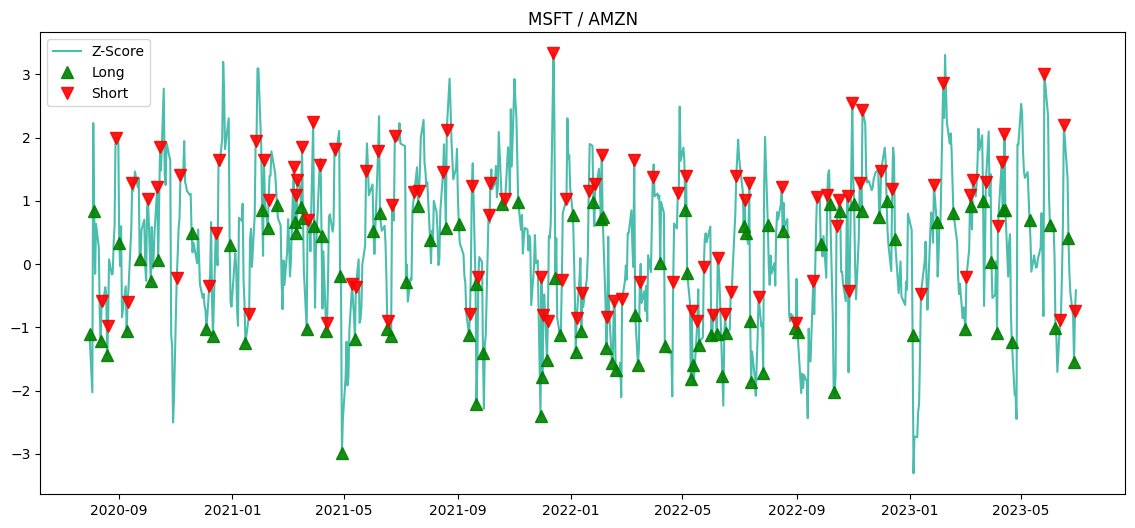

In [ ]:

plot_pair_trades(trade_signals)

In [ ]:

def plot_trades_1(signals):
  fig = plt.figure(figsize=(14,6))
  bx = fig.add_subplot(111)
  l1 = bx.plot(signals['price1'], c='#4abdac')
  u1 = bx.plot(signals['price1'][signals['position1'] == 1], lw=0, marker='^', markersize=7, c='g',alpha=0.9)
  u2, = bx.plot(signals['price1'][signals['position1'] == -1], lw=0, marker='v', markersize=7, c='r',alpha=0.9)
  plt.title(stock_pair[0])
  plt.legend(['Price', 'Long', 'Short'])

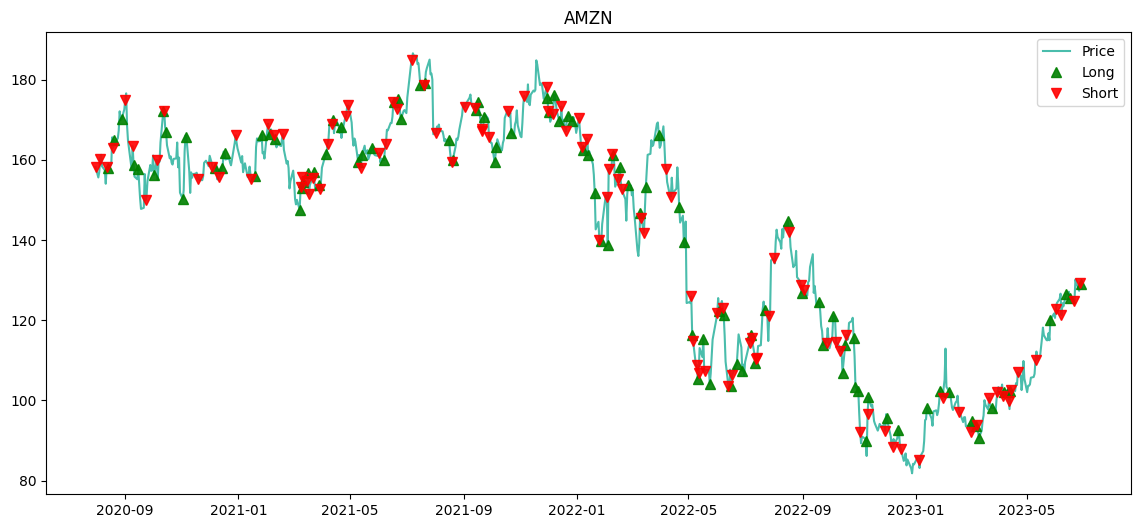

In [ ]:
plot_trades_1(trade_signals)

In [ ]:
def plot_trades_2(signals):
  fig=plt.figure(figsize=(14,6))
  bx = fig.add_subplot(111)
  l1 = bx.plot(signals['price2'], c='#4abdac')
  u1 = bx.plot(signals['price2'][signals['position2'] == 1], lw=0, marker='^', markersize=7, c='g',alpha=0.9)
  u2 = bx.plot(signals['price2'][signals['position2'] == -1], lw=0, marker='v', markersize=7, c='r',alpha=0.9)
  plt.title(stock_pair[1])
  plt.legend(['Price', 'Long', 'Short'])

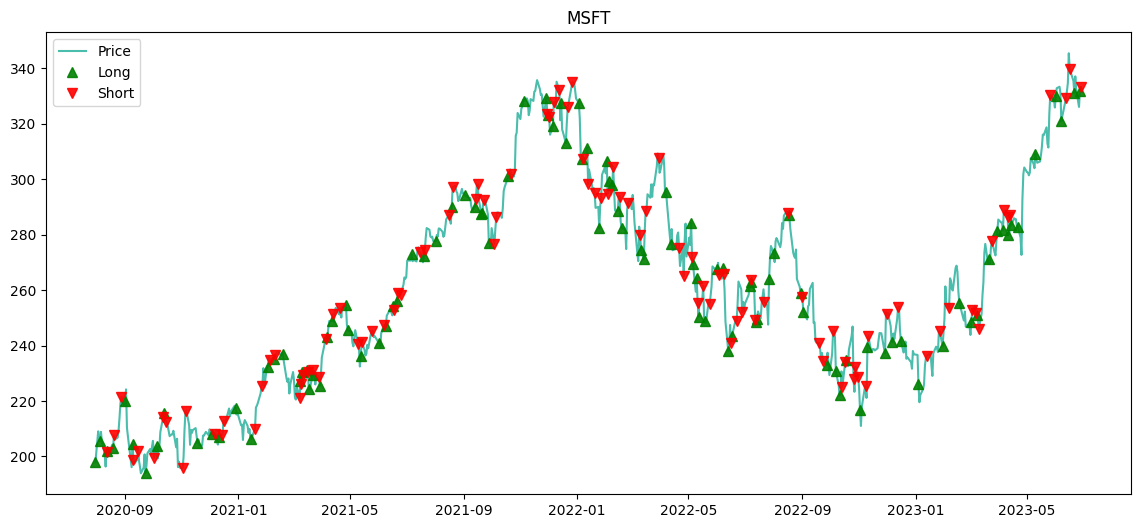

In [ ]:
plot_trades_2(trade_signals)

In [ ]:
def pnl_calculation(signals):

  initial_capital = 50000

  # Shares to buy for each stock
  shares1 = initial_capital// (signals['price1'][0])
  shares2 = initial_capital// (signals['price2'][0])

  #PnL for stock 1
  portfolio = pd.DataFrame()
  portfolio['holdings1'] = signals['position1'].cumsum() * signals['price1'] * shares1
  portfolio['cash1'] = initial_capital - (signals['position1'] * signals['price1'] * shares1).cumsum()
  portfolio['total1'] = portfolio['holdings1'] + portfolio['cash1']
  portfolio['return1'] = portfolio['total1'].pct_change()

  # PnL for stock 2
  portfolio['holdings2'] = signals['position2'].cumsum() * signals['price2'] * shares2
  portfolio['cash2'] = initial_capital - (signals['position2'] * signals['price2'] * shares2).cumsum()
  portfolio['total2'] = portfolio['holdings2'] + portfolio['cash2']
  portfolio['return2'] = portfolio['total2'].pct_change()

  # Total PnL
  portfolio['total'] = portfolio['total1'] + portfolio['total2']
  portfolio = portfolio.dropna()

  return portfolio


In [ ]:
portfolio = pnl_calculation(trade_signals)
portfolio.head()

,holdings1,cash1,total1,return1,holdings2,cash2,total2,return2,total
Date,,,,,,,,,
2020-08-03,-49012.266769,99843.707962,50831.441193,0.016629,52681.731262,123.383728,52805.114990,0.056102,103636.556183
2020-08-04,49436.571808,970.564346,50407.136154,-0.008347,-51891.032043,103905.447815,52014.415771,-0.014974,102421.551926
2020-08-05,0.000000,51449.785385,51449.785385,0.020685,0.000000,52099.552673,52099.552673,0.001637,103549.338058
2020-08-06,0.000000,51449.785385,51449.785385,0.000000,0.000000,52099.552673,52099.552673,0.000000,103549.338058
2020-08-07,0.000000,51449.785385,51449.785385,0.000000,0.000000,52099.552673,52099.552673,0.000000,103549.338058


In [ ]:
def plot_portfolio_value(portfolio):

  fig = plt.figure(figsize=(14,6),)
  ax = fig.add_subplot(111)
  l1, = ax.plot(portfolio['total'], c='g')
  ax.set_ylabel('Asset Value')
  ax.yaxis.labelpad=15
  ax.set_xlabel('Date')
  ax.xaxis.labelpad=15
  plt.title('Portfolio Performance PnL')
  plt.legend(['Total Portfolio Value'])

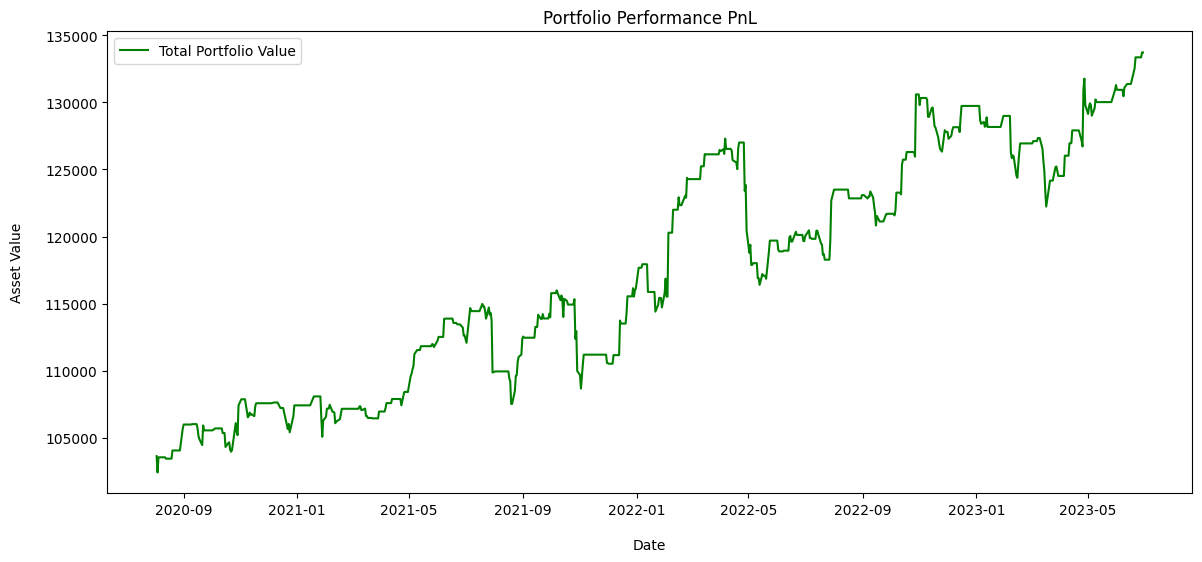

In [ ]:

plot_portfolio_value(portfolio)



#**Portfolio Returns**

In [ ]:
def calculate_cagr(portfolio):

  final_portfolio = portfolio['total'].iloc[-1]
  initial_portfolio = portfolio['total'].iloc[0]
  delta = len(portfolio.index)
  print('Number of trading days = ', delta)
  YEAR_DAYS = 252
  returns = (final_portfolio/initial_portfolio) ** (YEAR_DAYS/delta) - 1
  return returns

In [ ]:
print('CAGR = {:.3f}%' .format(calculate_cagr(portfolio) * 100))

Number of trading days =  732
CAGR = 9.170%


[*********************100%%**********************]  1 of 1 completed


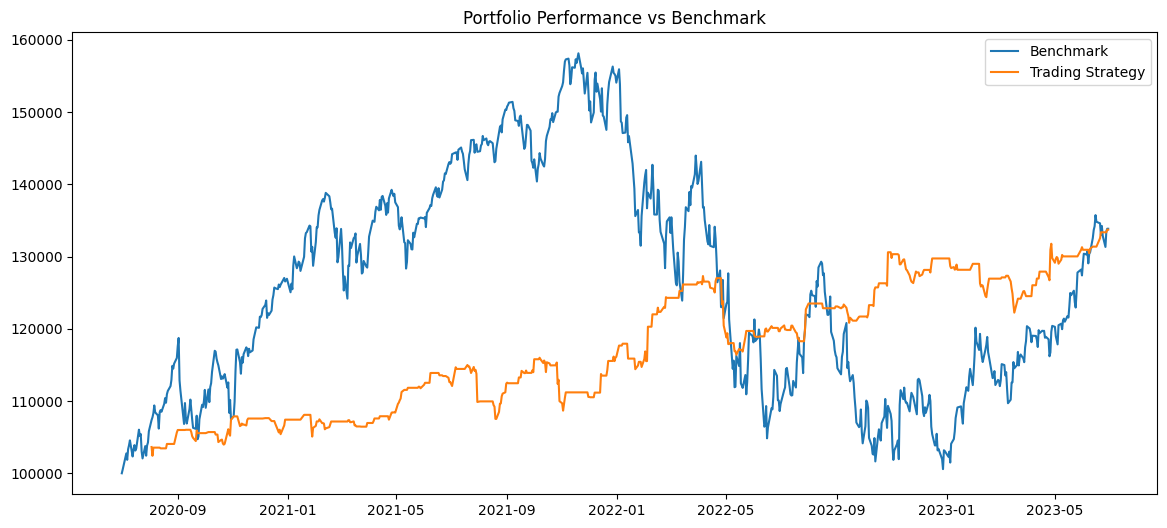

In [ ]:
index = yf.download('^IXIC', start = '2020-07-01', end = '2023-06-30')['Adj Close']
shares = 100000/index[0]

plt.figure(figsize = (14, 6))
plt.plot(index*shares)
plt.plot(portfolio['total'])
plt.title('Portfolio Performance vs Benchmark')
plt.legend(['Benchmark', 'Trading Strategy'])

In [ ]:
cagr_index = (index.iloc[-1] / index[0])**(252/len(index)) - 1
print("CAGR of NASDAQ:", np.round(cagr_index*100, 3), "%")
cagr_portfolio = (portfolio['total'][-1] / portfolio['total'][0]) ** (252/len(portfolio)) - 1
print("CAGR of trading strategy:", np.round(cagr_portfolio*100, 3), "%")

CAGR of NASDAQ: 10.233 %
CAGR of trading strategy: 9.17 %


In [ ]:
import yfinance as yf
import pandas as pd

# Get the stock prices of MSFT and AMZN for the last 3 years
msft = yf.download('MSFT', period='3y')['Adj Close']
amzn = yf.download('AMZN', period='3y')['Adj Close']

# Calculate the cumulative returns
# Extract closing prices for MSFT and AMZN
msft = data['MSFT']
amzn = data['AMZN']

# Calculate cumulative returns
msft_cumulative_return = (msft.iloc[-1] - msft.iloc[0]) / msft.iloc[0]
amzn_cumulative_return = (amzn.iloc[-1] - amzn.iloc[0]) / amzn.iloc[0]

print("MSFT Cumulative Return:", msft_cumulative_return)
print("AMZN Cumulative Return:", amzn_cumulative_return)

[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MSFT']: YFInvalidPeriodError("%ticker%: Period '3y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMZN']: YFInvalidPeriodError("%ticker%: Period '3y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


MSFT Cumulative Return: 1.7073985074635394
AMZN Cumulative Return: 1.4755732352632887


In [ ]:
def annualized_sharpe_ratio(returns, risk_free_rate):
  """Calculates the annualized Sharpe ratio.

  Args:
    returns: A pandas Series of returns.
    risk_free_rate: The risk-free rate.

  Returns:
    A float representing the annualized Sharpe ratio.
  """

  # Calculate the Sharpe ratio.
  sharpe_ratio = (returns.mean() - risk_free_rate) / returns.std()

  # Annualize the Sharpe ratio.

  annualized_sharpe_ratio = np.sqrt(252) * sharpe_ratio

  # Return the annualized Sharpe ratio.
  return annualized_sharpe_ratio


In [ ]:
msft = yf.download('MSFT', period='3y')['Adj Close']
amzn = yf.download('AMZN', period='3y')['Adj Close']
msft_returns = msft.pct_change().dropna()
amzn_returns = amzn.pct_change().dropna()
msft_annualized_sharpe_ratio = annualized_sharpe_ratio(msft_returns, risk_free_rate=0.03)
amzn_annualized_sharpe_ratio = annualized_sharpe_ratio(amzn_returns, risk_free_rate=0.03)
print('MSFT annualized Sharpe ratio:', msft_annualized_sharpe_ratio)
print('AMZN annualized Sharpe ratio:', amzn_annualized_sharpe_ratio)


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MSFT']: YFInvalidPeriodError("%ticker%: Period '3y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMZN']: YFInvalidPeriodError("%ticker%: Period '3y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


MSFT annualized Sharpe ratio: nan
AMZN annualized Sharpe ratio: nan


In [ ]:
# Calculate maximum drawdown for a given time series
def calculate_max_drawdown(series):
    """
    Calculate the maximum drawdown for a given time series.

    Parameters:
    series (pd.Series): Time series data.

    Returns:
    float: Maximum drawdown.
    """
    cum_returns = (1 + series.pct_change()).cumprod()
    peaks = cum_returns.cummax()
    drawdowns = (cum_returns - peaks) / peaks
    max_drawdown = drawdowns.min()
    return max_drawdown

# Calculate maximum drawdown for MSFT and AMZN for the past 3 years
msft_max_drawdown = calculate_max_drawdown(data['MSFT'][-732:])  # 252 trading days per year * 3 years = 756 days
amzn_max_drawdown = calculate_max_drawdown(data['AMZN'][-732:])

# Print the maximum drawdown for each stock
print('Maximum Drawdown for MSFT: {:.2%}'.format(msft_max_drawdown))
print('Maximum Drawdown for AMZN: {:.2%}'.format(amzn_max_drawdown))


Maximum Drawdown for MSFT: -28.04%
Maximum Drawdown for AMZN: -34.10%
